총 10개 게시글 링크 발견
2025년 8월 → 온라인: 224802 억원, 모바일: 178,489 억원
2025년 7월 → 온라인: 230335 억원, 모바일: 181,568 억원
2025년 6월 → 온라인: 218977 억원, 모바일: 170,339 억원
2025년 5월 → 온라인: 224870 억원, 모바일: 173,600 억원
2025년 4월 → 온라인: 216858 억원, 모바일: 167,943 억원
2025년 3월 → 온라인: 224163 억원, 모바일: 172,435 억원
2025년 2월 → 온라인: 210616 억원, 모바일: 161,308 억원
2025년 1월 → 온라인: 218674 억원, 모바일: 172,717 억원
2024년 12월 → 온라인: 212147 억원, 모바일: 162,048 억원
2024년 11월 → 온라인: 212233 억원, 모바일: 159,479 억원
     연도   월  온라인쇼핑거래액(억원)  모바일쇼핑거래액(억원)
0  2024  11        212233        159479
1  2024  12        212147        162048
2  2025   1        218674        172717
3  2025   2        210616        161308
4  2025   3        224163        172435
5  2025   4        216858        167943
6  2025   5        224870        173600
7  2025   6        218977        170339
8  2025   7        230335        181568
9  2025   8        224802        178489


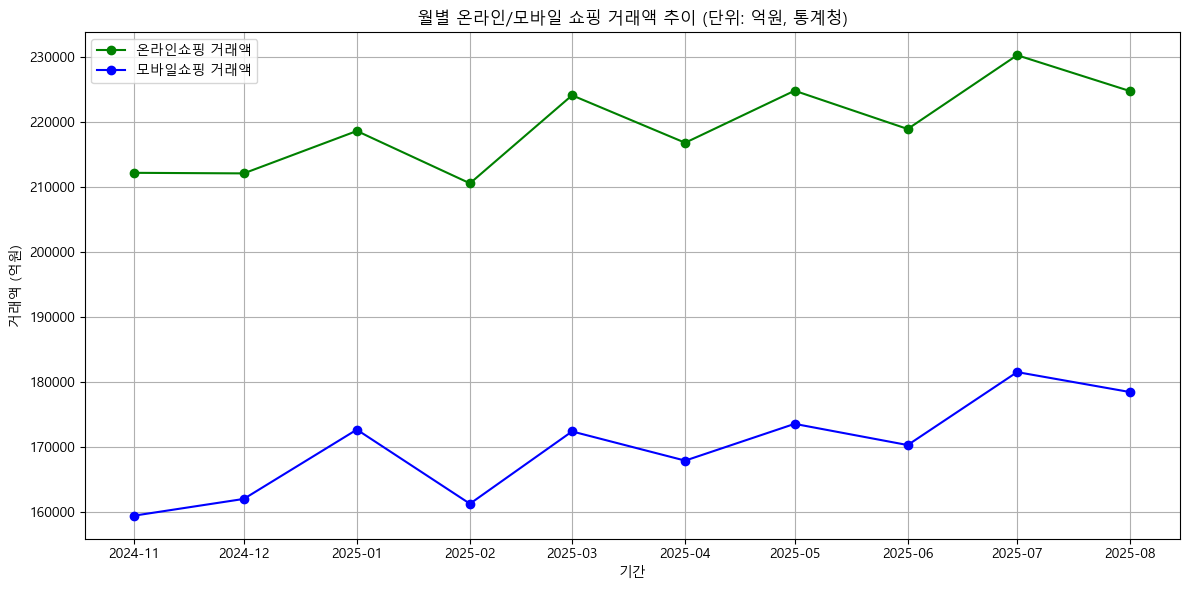

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import time

# Windows용 한글 폰트 설정 (Malgun Gothic)
font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows 한글 기본 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

def parse_amount(text):
    """
    '17조 8,489' → 178,489 (억원)
    '22조 4,802' → 224,802 (억원)
    """
    m = re.match(r'(?:(\d+)조)?\s*([\d,]+)', text)
    trillion = int(m.group(1)) if m and m.group(1) else 0
    rest = int(m.group(2).replace(",", "")) if m and m.group(2) else 0
    return trillion * 10000 + rest

base_url = "https://www.kostat.go.kr"
list_url = "https://www.kostat.go.kr/board.es?mid=a10301120300&bid=241"

headers = {"User-Agent": "Mozilla/5.0"}

resp = requests.get(list_url, headers=headers)
resp.encoding = 'utf-8'  # 응답 인코딩 명시
soup = BeautifulSoup(resp.text, "html.parser")


links = []
for a in soup.select("a.board_link"):
    href = a.get("href", "")
    m = re.search(r"addSearchParam\('(/board\.es\?[^']+)'", href)
    if m:
        full_url = base_url + m.group(1)
        links.append(full_url)

print(f"총 {len(links)}개 게시글 링크 발견")

data = []
for url in links:
    try:
        r = requests.get(url, headers=headers)
        s = BeautifulSoup(r.text, "html.parser")
        text = s.get_text(separator="\n")

        # 연도, 월 추출
        m = re.search(r'(\d{4})년\s*(\d{1,2})월', text)
        if not m:
            print(f"연도/월 정보 없음: {url}")
            continue
        year, month = m.groups()

        # 온라인쇼핑 거래액 추출 (22조 4,802억원 등)
        online_match = re.search(r'온라인쇼핑 거래액은\s*([\d조\s,]+)\s*억원', text)
        online_value = parse_amount(online_match.group(1)) if online_match else None

        # 모바일쇼핑 거래액 추출 (17조 8,489억원 등)
        mobile_match = re.search(r'모바일쇼핑\s*거래액은\s*([\d조\s,]+)\s*억원', text)
        mobile_value = parse_amount(mobile_match.group(1)) if mobile_match else None

        if mobile_value is None:
            print(f"모바일쇼핑 거래액 정보 없음: {url}")
            continue

        data.append({
            "연도": int(year),
            "월": int(month),
            "온라인쇼핑거래액(억원)": online_value,
            "모바일쇼핑거래액(억원)": mobile_value
        })

        print(f"{year}년 {month}월 → 온라인: {online_value if online_value else '정보없음'} 억원, 모바일: {mobile_value:,} 억원")

        time.sleep(0.5)
    except Exception as e:
        print(f"Error at {url}: {e}")

df = pd.DataFrame(data)
if not df.empty:
    df = df.sort_values(["연도", "월"]).reset_index(drop=True)
    print(df)

    plt.figure(figsize=(12,6))
    dates = pd.to_datetime(df["연도"].astype(str) + "-" + df["월"].astype(str) + "-01")

    if df["온라인쇼핑거래액(억원)"].notna().any():
        plt.plot(dates, df["온라인쇼핑거래액(억원)"], marker='o', label="온라인쇼핑 거래액", color='green')
    plt.plot(dates, df["모바일쇼핑거래액(억원)"], marker='o', label="모바일쇼핑 거래액", color='blue')

    plt.title("월별 온라인/모바일 쇼핑 거래액 추이 (단위: 억원, 통계청)")
    plt.ylabel("거래액 (억원)")
    plt.xlabel("기간")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("❗데이터를 추출하지 못했습니다.")


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import time

# Windows용 한글 폰트 설정 (Malgun Gothic)
font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows 한글 기본 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

def parse_amount(text):
    """
    '17조 8,489' → 178,489 (억원)
    '22조 4,802' → 224,802 (억원)
    """
    m = re.match(r'(?:(\d+)조)?\s*([\d,]+)', text)
    trillion = int(m.group(1)) if m and m.group(1) else 0
    rest = int(m.group(2).replace(",", "")) if m and m.group(2) else 0
    return trillion * 10000 + rest

base_url = "https://www.kostat.go.kr"
list_url = "https://www.kostat.go.kr/board.es?mid=a10301120300&bid=241"

headers = {"User-Agent": "Mozilla/5.0"}

resp = requests.get(list_url, headers=headers)
resp.encoding = 'utf-8'  # 응답 인코딩 명시
soup = BeautifulSoup(resp.text, "html.parser")


links = []
for a in soup.select("a.board_link"):
    href = a.get("href", "")
    m = re.search(r"addSearchParam\('(/board\.es\?[^']+)'", href)
    if m:
        full_url = base_url + m.group(1)
        links.append(full_url)

print(f"총 {len(links)}개 게시글 링크 발견")

data = []
for url in links:
    try:
        r = requests.get(url, headers=headers)
        s = BeautifulSoup(r.text, "html.parser")
        text = s.get_text(separator="\n")

        # 연도, 월 추출
        m = re.search(r'(\d{4})년\s*(\d{1,2})월', text)
        if not m:
            print(f"연도/월 정보 없음: {url}")
            continue
        year, month = m.groups()

        # 온라인쇼핑 거래액 추출 (22조 4,802억원 등)
        online_match = re.search(r'온라인쇼핑 거래액은\s*([\d조\s,]+)\s*억원', text)
        online_value = parse_amount(online_match.group(1)) if online_match else None

        # 모바일쇼핑 거래액 추출 (17조 8,489억원 등)
        mobile_match = re.search(r'모바일쇼핑\s*거래액은\s*([\d조\s,]+)\s*억원', text)
        mobile_value = parse_amount(mobile_match.group(1)) if mobile_match else None

        if mobile_value is None:
            print(f"모바일쇼핑 거래액 정보 없음: {url}")
            continue

        data.append({
            "연도": int(year),
            "월": int(month),
            "온라인쇼핑거래액(억원)": online_value,
            "모바일쇼핑거래액(억원)": mobile_value
        })

        print(f"{year}년 {month}월 → 온라인: {online_value if online_value else '정보없음'} 억원, 모바일: {mobile_value:,} 억원")

        time.sleep(0.5)
    except Exception as e:
        print(f"Error at {url}: {e}")

df = pd.DataFrame(data)
if not df.empty:
    df = df.sort_values(["연도", "월"]).reset_index(drop=True)
    print(df)

    plt.figure(figsize=(12,6))
    dates = pd.to_datetime(df["연도"].astype(str) + "-" + df["월"].astype(str) + "-01")

    if df["온라인쇼핑거래액(억원)"].notna().any():
        plt.plot(dates, df["온라인쇼핑거래액(억원)"], marker='o', label="온라인쇼핑 거래액", color='green')
    plt.plot(dates, df["모바일쇼핑거래액(억원)"], marker='o', label="모바일쇼핑 거래액", color='blue')

    plt.title("월별 온라인/모바일 쇼핑 거래액 추이 (단위: 억원, 통계청)")
    plt.ylabel("거래액 (억원)")
    plt.xlabel("기간")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("❗데이터를 추출하지 못했습니다.")


총 16 페이지 크롤링 시작

=== 1 페이지 크롤링 ===
1 페이지에서 총 10개 게시글 링크 발견
2025년 8월 → 온라인: 224802 억원, 모바일: 178,489 억원
2025년 7월 → 온라인: 230335 억원, 모바일: 181,568 억원
2025년 6월 → 온라인: 218977 억원, 모바일: 170,339 억원
2025년 5월 → 온라인: 224870 억원, 모바일: 173,600 억원
2025년 4월 → 온라인: 216858 억원, 모바일: 167,943 억원
2025년 3월 → 온라인: 224163 억원, 모바일: 172,435 억원
2025년 2월 → 온라인: 210616 억원, 모바일: 161,308 억원
2025년 1월 → 온라인: 218674 억원, 모바일: 172,717 억원
2024년 12월 → 온라인: 212147 억원, 모바일: 162,048 억원
2024년 11월 → 온라인: 212233 억원, 모바일: 159,479 억원

=== 2 페이지 크롤링 ===
2 페이지에서 총 10개 게시글 링크 발견
2025년 8월 → 온라인: 224802 억원, 모바일: 178,489 억원
2025년 7월 → 온라인: 230335 억원, 모바일: 181,568 억원
2025년 6월 → 온라인: 218977 억원, 모바일: 170,339 억원
2025년 5월 → 온라인: 224870 억원, 모바일: 173,600 억원
2025년 4월 → 온라인: 216858 억원, 모바일: 167,943 억원
2025년 3월 → 온라인: 224163 억원, 모바일: 172,435 억원
2025년 2월 → 온라인: 210616 억원, 모바일: 161,308 억원
2025년 1월 → 온라인: 218674 억원, 모바일: 172,717 억원
2024년 12월 → 온라인: 212147 억원, 모바일: 162,048 억원
2024년 11월 → 온라인: 212233 억원, 모바일: 159,479 억원

=== 3 페이지 크롤링 ===
3 페이지에서 총 10개 게

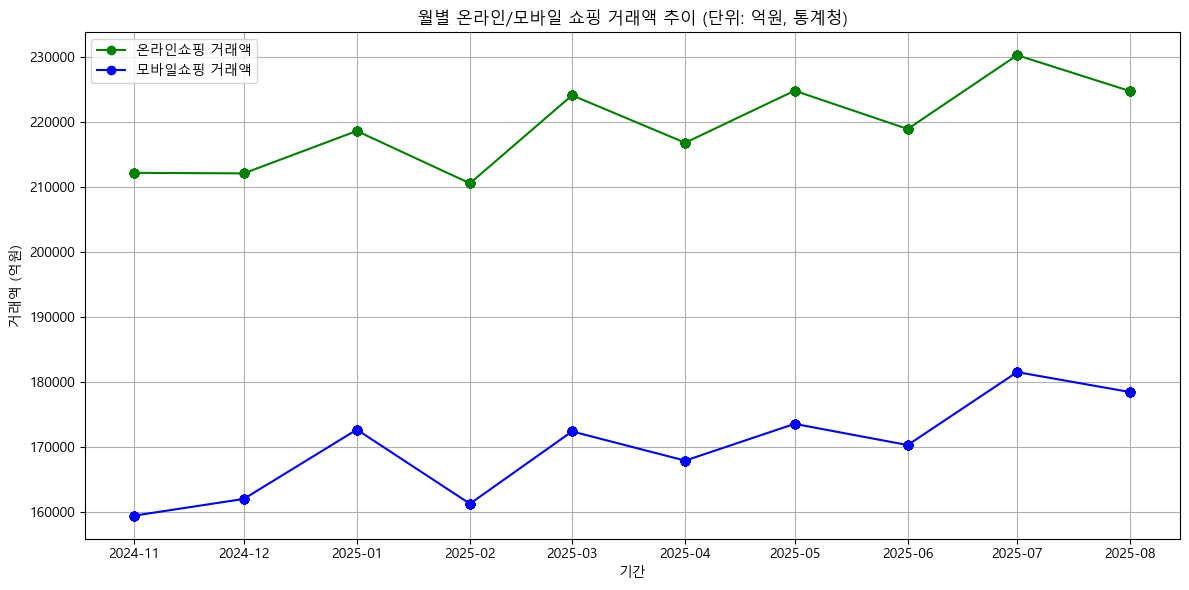

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import time

# Windows용 한글 폰트 설정 (Malgun Gothic)
font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows 한글 기본 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

def parse_amount(text):
    """
    '17조 8,489' → 178,489 (억원)
    '22조 4,802' → 224,802 (억원)
    """
    m = re.match(r'(?:(\d+)조)?\s*([\d,]+)', text)
    trillion = int(m.group(1)) if m and m.group(1) else 0
    rest = int(m.group(2).replace(",", "")) if m and m.group(2) else 0
    return trillion * 10000 + rest

base_url = "https://www.kostat.go.kr/board.es"
params = {
    "mid": "a10301120300",
    "bid": "241",
    "page": 1
}

headers = {"User-Agent": "Mozilla/5.0"}

# 첫 페이지 요청해서 전체 페이지 수 알아내기
resp = requests.get(base_url, params=params, headers=headers)
resp.encoding = 'utf-8'
soup = BeautifulSoup(resp.text, "html.parser")

# 페이지 번호 링크들 선택 (예: <a href="javascript:void(0);" onclick="goPage('2'); return false;">2</a>)
page_links = soup.select("a[onclick^='goPage']")
page_numbers = []
for link in page_links:
    try:
        # goPage('숫자')에서 숫자만 추출
        m = re.search(r"goPage\('(\d+)'\)", link["onclick"])
        if m:
            page_numbers.append(int(m.group(1)))
    except:
        pass

if page_numbers:
    max_page = max(page_numbers)
else:
    max_page = 1

print(f"총 {max_page} 페이지 크롤링 시작")

data = []

for page in range(1, max_page + 1):
    print(f"\n=== {page} 페이지 크롤링 ===")
    params["page"] = page
    resp = requests.get(base_url, params=params, headers=headers)
    resp.encoding = 'utf-8'
    soup = BeautifulSoup(resp.text, "html.parser")

    links = []
    for a in soup.select("a.board_link"):
        href = a.get("href", "")
        m = re.search(r"addSearchParam\('(/board\.es\?[^']+)'", href)
        if m:
            full_url = "https://www.kostat.go.kr" + m.group(1)
            links.append(full_url)

    print(f"{page} 페이지에서 총 {len(links)}개 게시글 링크 발견")

    for url in links:
        try:
            r = requests.get(url, headers=headers)
            r.encoding = 'utf-8'
            s = BeautifulSoup(r.text, "html.parser")
            text = s.get_text(separator="\n")

            # 연도, 월 추출
            m = re.search(r'(\d{4})년\s*(\d{1,2})월', text)
            if not m:
                print(f"연도/월 정보 없음: {url}")
                continue
            year, month = m.groups()

            # 온라인쇼핑 거래액 추출
            online_match = re.search(r'온라인쇼핑 거래액은\s*([\d조\s,]+)\s*억원', text)
            online_value = parse_amount(online_match.group(1)) if online_match else None

            # 모바일쇼핑 거래액 추출
            mobile_match = re.search(r'모바일쇼핑\s*거래액은\s*([\d조\s,]+)\s*억원', text)
            mobile_value = parse_amount(mobile_match.group(1)) if mobile_match else None

            if mobile_value is None:
                print(f"모바일쇼핑 거래액 정보 없음: {url}")
                continue

            data.append({
                "연도": int(year),
                "월": int(month),
                "온라인쇼핑거래액(억원)": online_value,
                "모바일쇼핑거래액(억원)": mobile_value
            })

            print(f"{year}년 {month}월 → 온라인: {online_value if online_value else '정보없음'} 억원, 모바일: {mobile_value:,} 억원")

            time.sleep(0.5)
        except Exception as e:
            print(f"Error at {url}: {e}")

df = pd.DataFrame(data)
if not df.empty:
    df = df.sort_values(["연도", "월"]).reset_index(drop=True)
    print(df)

    plt.figure(figsize=(12,6))
    dates = pd.to_datetime(df["연도"].astype(str) + "-" + df["월"].astype(str) + "-01")

    if df["온라인쇼핑거래액(억원)"].notna().any():
        plt.plot(dates, df["온라인쇼핑거래액(억원)"], marker='o', label="온라인쇼핑 거래액", color='green')
    plt.plot(dates, df["모바일쇼핑거래액(억원)"], marker='o', label="모바일쇼핑 거래액", color='blue')

    plt.title("월별 온라인/모바일 쇼핑 거래액 추이 (단위: 억원, 통계청)")
    plt.ylabel("거래액 (억원)")
    plt.xlabel("기간")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("❗데이터를 추출하지 못했습니다.")


In [2]:
import re
import time
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

import requests
from bs4 import BeautifulSoup

from selenium.webdriver.common.by import By  # 꼭 import 추가

# 1) 한글 폰트 설정 (Windows용, Malgun Gothic)
font_path = "C:/Windows/Fonts/malgun.ttf"  # 윈도우 기본 한글 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 2) 금액 파싱 함수 ('22조 4,802' -> 224,802억원)
def parse_amount(text):
    m = re.match(r'(?:(\d+)조)?\s*([\d,]+)', text)
    trillion = int(m.group(1)) if m and m.group(1) else 0
    rest = int(m.group(2).replace(",", "")) if m and m.group(2) else 0
    return trillion * 10000 + rest

# 3) Selenium 웹드라이버 설정
options = Options()
options.add_argument("--headless")  # 브라우저 창 안 띄우기
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

base_url = "https://www.kostat.go.kr/board.es?mid=a10301120300&bid=241"
driver.get(base_url)
time.sleep(2)

headers = {"User-Agent": "Mozilla/5.0"}

all_links = []

# 4) 1~3페이지 게시글 링크 수집
for page in range(1, 4):
    print(f"=== {page} 페이지 크롤링 시작 ===")
    
    # 게시글 링크 수집
    links = driver.find_elements(By.CSS_SELECTOR, "a.board_link")
    count_before = len(all_links)
    for a in links:
        href = a.get_attribute("href")
        if href and href.startswith("javascript:addSearchParam"):
            # href는 자바스크립트 함수 호출형태임 -> URL 추출
            m = re.search(r"addSearchParam\('(/board\.es\?[^']+)'", href)
            if m:
                full_url = "https://www.kostat.go.kr" + m.group(1)
                all_links.append(full_url)

    print(f"{page} 페이지에서 총 게시글 링크 수집: {len(all_links)}")
    
    # 마지막 페이지가 아니면 다음 페이지로 이동
    if page < 3:
        page_buttons = driver.find_elements(By.CSS_SELECTOR, "a")
        clicked = False
        for btn in page_buttons:
            onclick = btn.get_attribute("onclick")
            if onclick and f"goPage('{page + 1}')" in onclick:
                btn.click()
                clicked = True
                break
        if not clicked:
            print(f"{page + 1} 페이지 버튼을 찾지 못했습니다.")
        time.sleep(2)  # 페이지 로딩 대기

driver.quit()

print(f"총 수집한 게시글 링크 수: {len(all_links)}")

# 5) 게시글에서 데이터 추출 및 최근 3년 필터링 (2023년 1월부터)
data = []
for url in all_links:
    try:
        r = requests.get(url, headers=headers)
        r.encoding = 'utf-8'
        soup = BeautifulSoup(r.text, "html.parser")
        text = soup.get_text(separator="\n")

        # 연도, 월 추출
        m = re.search(r'(\d{4})년\s*(\d{1,2})월', text)
        if not m:
            print(f"연도/월 정보 없음: {url}")
            continue
        year, month = map(int, m.groups())
        
        # 2023년 1월 이전 데이터면 스킵
        if year < 2023 or (year == 2023 and month < 1):
            continue

        # 온라인쇼핑 거래액 추출
        online_match = re.search(r'온라인쇼핑 거래액은\s*([\d조\s,]+)\s*억원', text)
        online_value = parse_amount(online_match.group(1)) if online_match else None

        # 모바일쇼핑 거래액 추출
        mobile_match = re.search(r'모바일쇼핑\s*거래액은\s*([\d조\s,]+)\s*억원', text)
        mobile_value = parse_amount(mobile_match.group(1)) if mobile_match else None

        if mobile_value is None:
            print(f"모바일쇼핑 거래액 정보 없음: {url}")
            continue

        data.append({
            "연도": year,
            "월": month,
            "온라인쇼핑거래액(억원)": online_value,
            "모바일쇼핑거래액(억원)": mobile_value
        })

        print(f"{year}년 {month}월 → 온라인: {online_value if online_value else '정보없음'} 억원, 모바일: {mobile_value:,} 억원")

        time.sleep(0.3)
    except Exception as e:
        print(f"Error at {url}: {e}")

# 6) DataFrame 생성 및 정렬
df = pd.DataFrame(data)
if not df.empty:
    df = df.sort_values(["연도", "월"]).reset_index(drop=True)
    print(df)

    # 7) 시각화
    plt.figure(figsize=(12,6))
    dates = pd.to_datetime(df["연도"].astype(str) + "-" + df["월"].astype(str) + "-01")

    if df["온라인쇼핑거래액(억원)"].notna().any():
        plt.plot(dates, df["온라인쇼핑거래액(억원)"], marker='o', label="온라인쇼핑 거래액", color='green')
    plt.plot(dates, df["모바일쇼핑거래액(억원)"], marker='o', label="모바일쇼핑 거래액", color='blue')

    plt.title("월별 온라인/모바일 쇼핑 거래액 추이 (단위: 억원, 통계청)")
    plt.ylabel("거래액 (억원)")
    plt.xlabel("기간")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("❗데이터를 추출하지 못했습니다.")


=== 1 페이지 크롤링 시작 ===
1 페이지에서 총 게시글 링크 수집: 0
=== 2 페이지 크롤링 시작 ===
2 페이지에서 총 게시글 링크 수집: 0
=== 3 페이지 크롤링 시작 ===
3 페이지에서 총 게시글 링크 수집: 0
총 수집한 게시글 링크 수: 0
❗데이터를 추출하지 못했습니다.
